In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [3]:
NUM_WORDS = 10000


(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences),dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # results[i]의 특정 인덱스만 1로 설정합니다
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/kimjinsung/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/kimjinsung/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

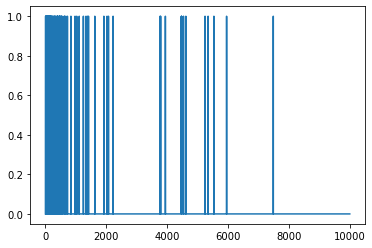

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss = 'binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history=baseline_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Epoch 1/20
49/49 - 5s - loss: 0.4589 - accuracy: 0.8121 - binary_crossentropy: 0.4589 - val_loss: 0.3185 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3185
Epoch 2/20
49/49 - 1s - loss: 0.2310 - accuracy: 0.9166 - binary_crossentropy: 0.2310 - val_loss: 0.2829 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2829
Epoch 3/20
49/49 - 1s - loss: 0.1714 - accuracy: 0.9399 - binary_crossentropy: 0.1714 - val_loss: 0.3037 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3037
Epoch 4/20
49/49 - 1s - loss: 0.1384 - accuracy: 0.9534 - binary_crossentropy: 0.1384 - val_loss: 0.3206 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3206
Epoch 5/20
49/49 - 1s - loss: 0.1148 - accuracy: 0.9619 - binary_crossentropy: 0.1148 - val_loss: 0.3512 - val_accuracy: 0.8738 - val_binary_crossentropy: 0.3512
Epoch 6/20
49/49 - 1s - loss: 0.0949 - accuracy: 0.9710 - binary_crossentropy: 0.0949 - val_loss: 0.3933 - val_accuracy: 0.8657 - val_binary_crossentropy: 0.3933
Epoch 7/20
49/49 - 1s - loss

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4,activation='relu',input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 5s - loss: 0.6094 - accuracy: 0.7300 - binary_crossentropy: 0.6094 - val_loss: 0.5252 - val_accuracy: 0.8217 - val_binary_crossentropy: 0.5252
Epoch 2/20
49/49 - 1s - loss: 0.4358 - accuracy: 0.8754 - binary_crossentropy: 0.4358 - val_loss: 0.3999 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.3999
Epoch 3/20
49/49 - 1s - loss: 0.3181 - accuracy: 0.9095 - binary_crossentropy: 0.3181 - val_loss: 0.3295 - val_accuracy: 0.8834 - val_binary_crossentropy: 0.3295
Epoch 4/20
49/49 - 1s - loss: 0.2505 - accuracy: 0.9240 - binary_crossentropy: 0.2505 - val_loss: 0.2982 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2982
Epoch 5/20
49/49 - 1s - loss: 0.2100 - accuracy: 0.9343 - binary_crossentropy: 0.2100 - val_loss: 0.2870 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2870
Epoch 6/20
49/49 - 1s - loss: 0.1832 - accuracy: 0.9419 - binary_crossentropy: 0.1832 - val_loss: 0.2853 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2853
Epoch 7/20
49/49 - 1s - loss

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 8s - loss: 0.3547 - accuracy: 0.8400 - binary_crossentropy: 0.3547 - val_loss: 0.2903 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.2903
Epoch 2/20
49/49 - 5s - loss: 0.1425 - accuracy: 0.9478 - binary_crossentropy: 0.1425 - val_loss: 0.3211 - val_accuracy: 0.8765 - val_binary_crossentropy: 0.3211
Epoch 3/20
49/49 - 4s - loss: 0.0447 - accuracy: 0.9873 - binary_crossentropy: 0.0447 - val_loss: 0.4562 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.4562
Epoch 4/20
49/49 - 4s - loss: 0.0051 - accuracy: 0.9993 - binary_crossentropy: 0.0051 - val_loss: 0.5926 - val_accuracy: 0.8714 - val_binary_crossentropy: 0.5926
Epoch 5/20
49/49 - 4s - loss: 5.4512e-04 - accuracy: 1.0000 - binary_crossentropy: 5.4512e-04 - val_loss: 0.6926 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.6926
Epoch 6/20
49/49 - 4s - loss: 1.9364e-04 - accuracy: 1.0000 - binary_crossentropy: 1.9364e-04 - val_loss: 0.7413 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.7413
Epoch 7/20
4

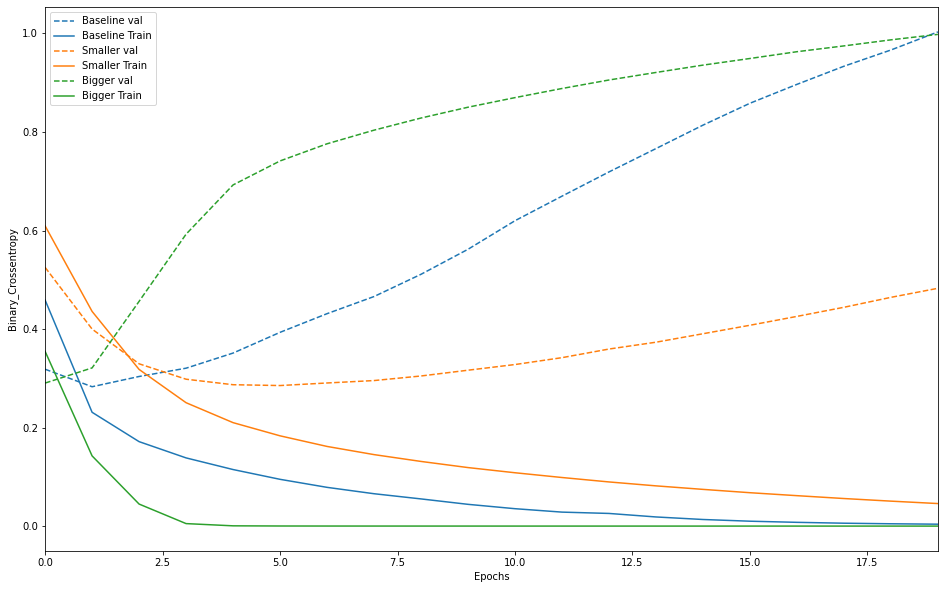

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('-',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger',bigger_history)])

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu',input_shape=(NUM_WORDS,)),
    
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Epoch 1/20
49/49 - 5s - loss: 0.5628 - accuracy: 0.7994 - binary_crossentropy: 0.5245 - val_loss: 0.4256 - val_accuracy: 0.8618 - val_binary_crossentropy: 0.3844
Epoch 2/20
49/49 - 1s - loss: 0.3396 - accuracy: 0.8977 - binary_crossentropy: 0.2917 - val_loss: 0.3475 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2948
Epoch 3/20
49/49 - 1s - loss: 0.2816 - accuracy: 0.9175 - binary_crossentropy: 0.2256 - val_loss: 0.3415 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2837
Epoch 4/20
49/49 - 1s - loss: 0.2563 - accuracy: 0.9306 - binary_crossentropy: 0.1967 - val_loss: 0.3471 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.2866
Epoch 5/20
49/49 - 1s - loss: 0.2411 - accuracy: 0.9370 - binary_crossentropy: 0.1795 - val_loss: 0.3524 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.2903
Epoch 6/20
49/49 - 1s - loss: 0.2294 - accuracy: 0.9424 - binary_crossentropy: 0.1664 - val_loss: 0.3618 - val_accuracy: 0.8803 - val_binary_crossentropy: 0.2986
Epoch 7/20
49/49 - 1s - loss

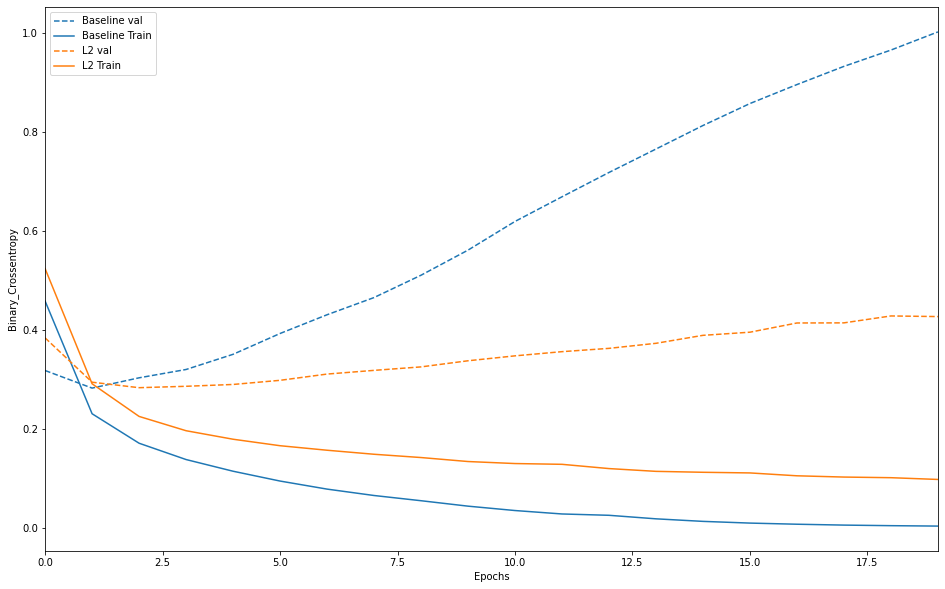

In [15]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [16]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 5s - loss: 0.6494 - accuracy: 0.6055 - binary_crossentropy: 0.6494 - val_loss: 0.5457 - val_accuracy: 0.8433 - val_binary_crossentropy: 0.5457
Epoch 2/20
49/49 - 1s - loss: 0.5091 - accuracy: 0.7722 - binary_crossentropy: 0.5091 - val_loss: 0.3977 - val_accuracy: 0.8743 - val_binary_crossentropy: 0.3977
Epoch 3/20
49/49 - 1s - loss: 0.3978 - accuracy: 0.8494 - binary_crossentropy: 0.3978 - val_loss: 0.3192 - val_accuracy: 0.8854 - val_binary_crossentropy: 0.3192
Epoch 4/20
49/49 - 1s - loss: 0.3324 - accuracy: 0.8867 - binary_crossentropy: 0.3324 - val_loss: 0.2930 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2930
Epoch 5/20
49/49 - 1s - loss: 0.2807 - accuracy: 0.9074 - binary_crossentropy: 0.2807 - val_loss: 0.2835 - val_accuracy: 0.8878 - val_binary_crossentropy: 0.2835
Epoch 6/20
49/49 - 1s - loss: 0.2400 - accuracy: 0.9215 - binary_crossentropy: 0.2400 - val_loss: 0.2858 - val_accuracy: 0.8844 - val_binary_crossentropy: 0.2858
Epoch 7/20
49/49 - 1s - loss

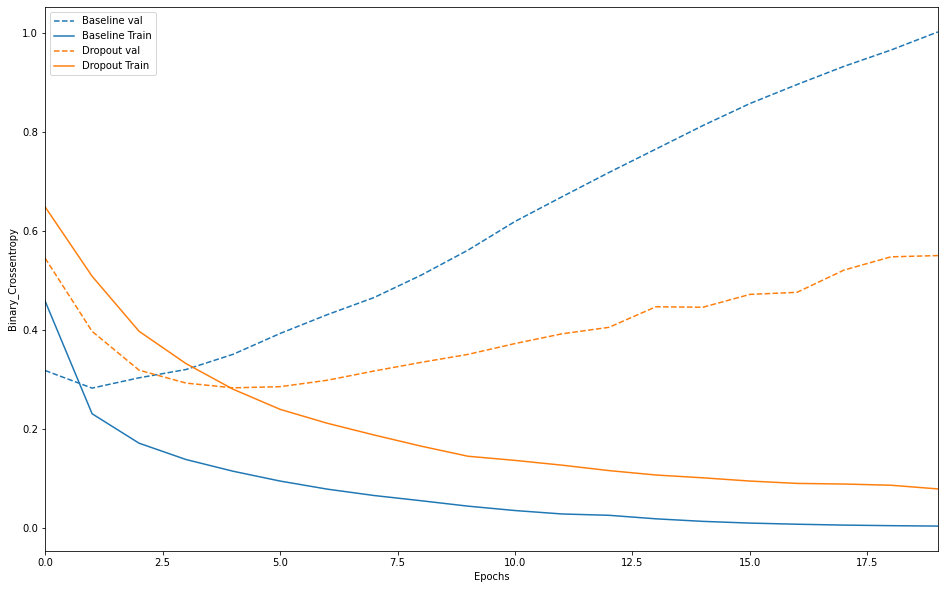

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### 이 문서에서 다루지 않은 중요한 방법 두 가지는 데이터 증식(data-augmentation)과 배치 정규화(batch normalization)입니다.